In [1]:
import pandas as pd
import numpy as np
import settings
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
global_features = pd.read_csv(f'result/experiment/dataset_stanford_{settings.MODEL}_{settings.DATASET}_{settings.FEATURE_NAMES}_positive_features_unique.csv')
local_features = pd.read_csv(f'positive_unique_feature.csv')

In [4]:
local_features=local_features[['name','class','unit_rank','unit','label']]

Get top 1/3 from each class global features

In [9]:
gf_1 = global_features.groupby('class').head(1)

In [10]:
gf_5 = global_features.groupby('class').head(5).sort_values(['class','unit_rank'])
gf_5_list = pd.DataFrame(gf_5.groupby('class')['label'].apply(list).reset_index())

In [11]:
gf_10 = global_features.groupby('class').head(10).sort_values(['class','unit_rank'])
gf_10_list = pd.DataFrame(gf_10.groupby('class')['label'].apply(list).reset_index())

Get top 3 from each class local features

In [14]:
lf_5 = local_features.groupby('name').head(5).sort_values(['class','unit_rank'])
lf_5_list = pd.DataFrame(lf_5.groupby(['name','class'])['label'].apply(list).reset_index())

In [15]:
lf_10 = local_features.groupby('name').head(10).sort_values(['class','unit_rank'])
lf_10_list = pd.DataFrame(lf_10.groupby(['name','class'])['label'].apply(list).reset_index())

Metrics based on Top 5 Local and Top 1 Global

In [17]:
df_label_1 = lf_5_list.merge(gf_1[['class','label']],on='class',how='outer')

In [19]:
def comparison(list_,label):
    if label in list_:
        return label
    else:
        return list_[0]

In [20]:
df_label_1['label_contained'] = df_label_1.apply(lambda x: comparison(x.label_x, x.label_y), axis=1)

In [25]:
df_label_1['y_true'] = 1

In [26]:
df_label_1['y_predict'] = df_label_1.apply(lambda x: 1 if x.label_y == x.label_contained else 0, axis=1)

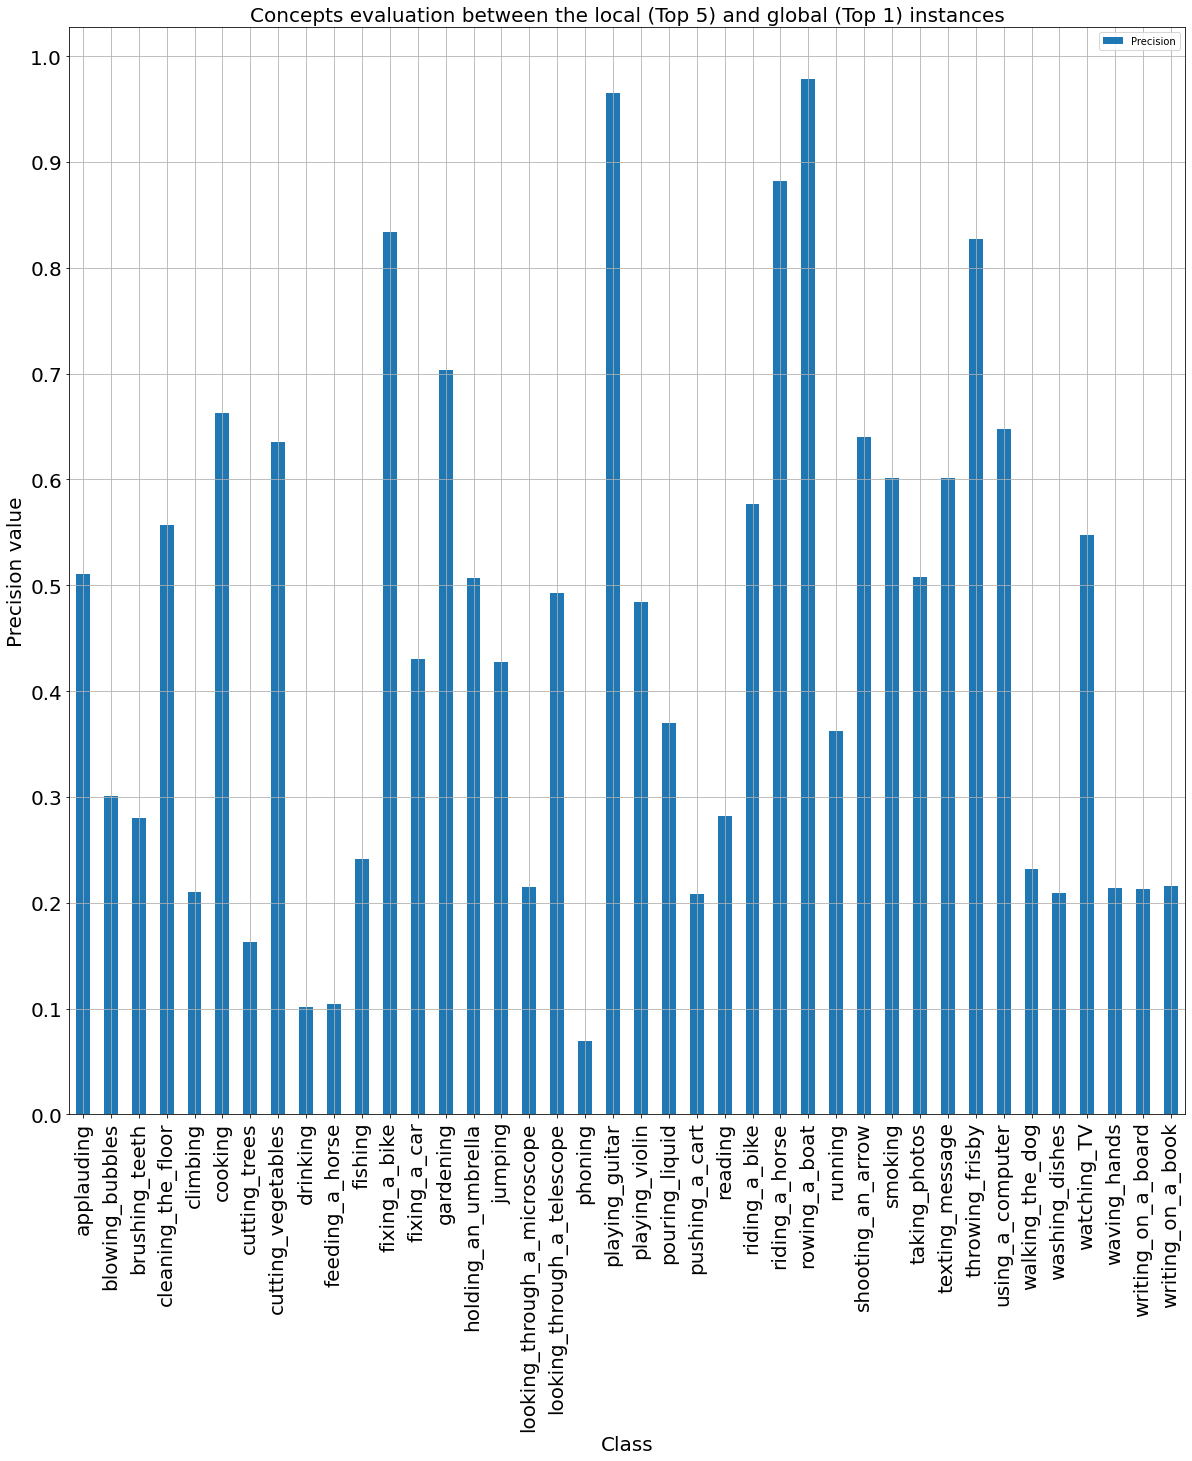

In [103]:
fig, ax = plt.subplots(figsize=(20, 20))
df_label_1.groupby('class').agg({'y_predict':'mean'}).plot(kind='bar',ax=ax,grid=True)
ax.legend(['Precision'])
plt.title('Concepts evaluation between the local (Top 5) and global (Top 1) instances', fontsize=20)
plt.yticks(np.arange(0,1.1, 0.1),fontsize=20)
plt.ylabel('Precision value',fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Class',fontsize=20)
plt.show()

Metrics based on Top 5 Local and Top 5 Global

In [30]:
df_label_5 = lf_5_list.merge(gf_5_list[['class','label']],on='class',how='outer')

In [31]:
def comparison_list(list1,list2):
    l1 = set(list1)
    l2 = set(list2)
    if len(l1.intersection(l2)) > 0:
        return 1
    else:
        return 0

In [32]:
def precision(list1,list2):
    l1 = set(list1)
    l2 = set(list2)
    return len(l1.intersection(l2))/len(l1)

In [33]:
df_label_5['y_true'] = 1

In [34]:
df_label_5['y_predict'] = df_label_5.apply(lambda x: comparison_list(x.label_x, x.label_y), axis=1)

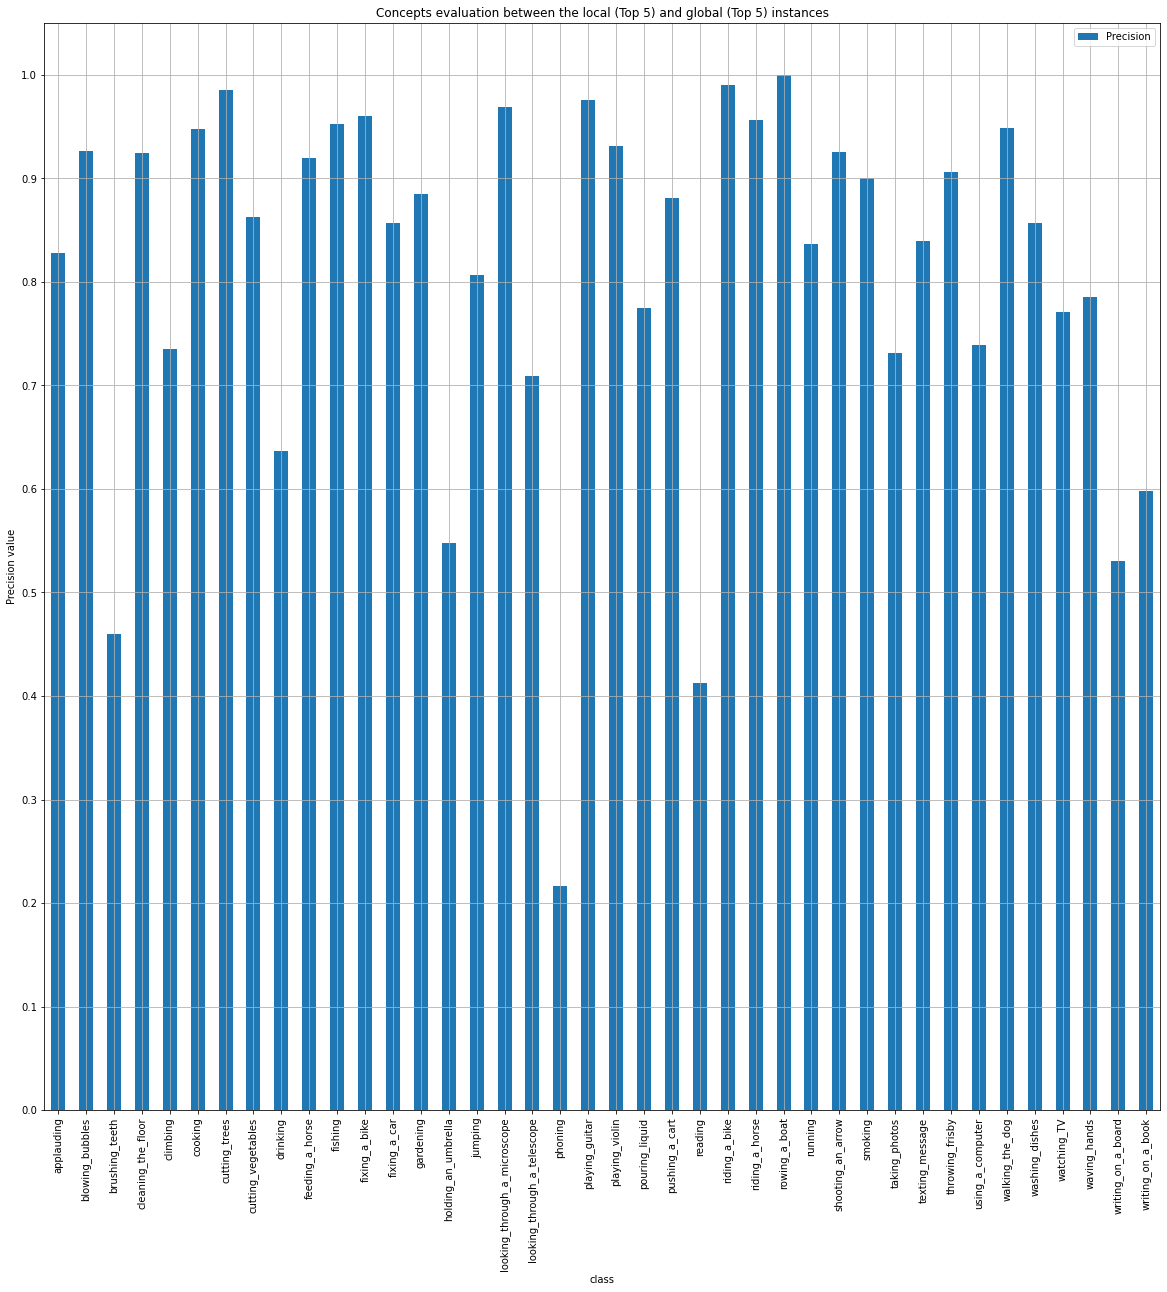

In [39]:
fig, ax = plt.subplots(figsize=(20, 20))
df_label_5.groupby('class').agg({'y_predict':'mean'}).plot(kind='bar',ax=ax,grid=True)
ax.legend(['Precision'])
plt.title('Concepts evaluation between the local (Top 5) and global (Top 5) instances')
plt.yticks(np.arange(0,1.1, 0.1))
plt.ylabel('Precision value')
plt.show()

Metrics based on Top 5 Local and Top 10 Global

In [41]:
df_label_10 = lf_5_list.merge(gf_10_list[['class','label']],on='class',how='outer')

In [42]:
df_label_10['y_true'] = 1

In [43]:
df_label_10['y_predict'] = df_label_10.apply(lambda x: comparison_list(x.label_x, x.label_y), axis=1)

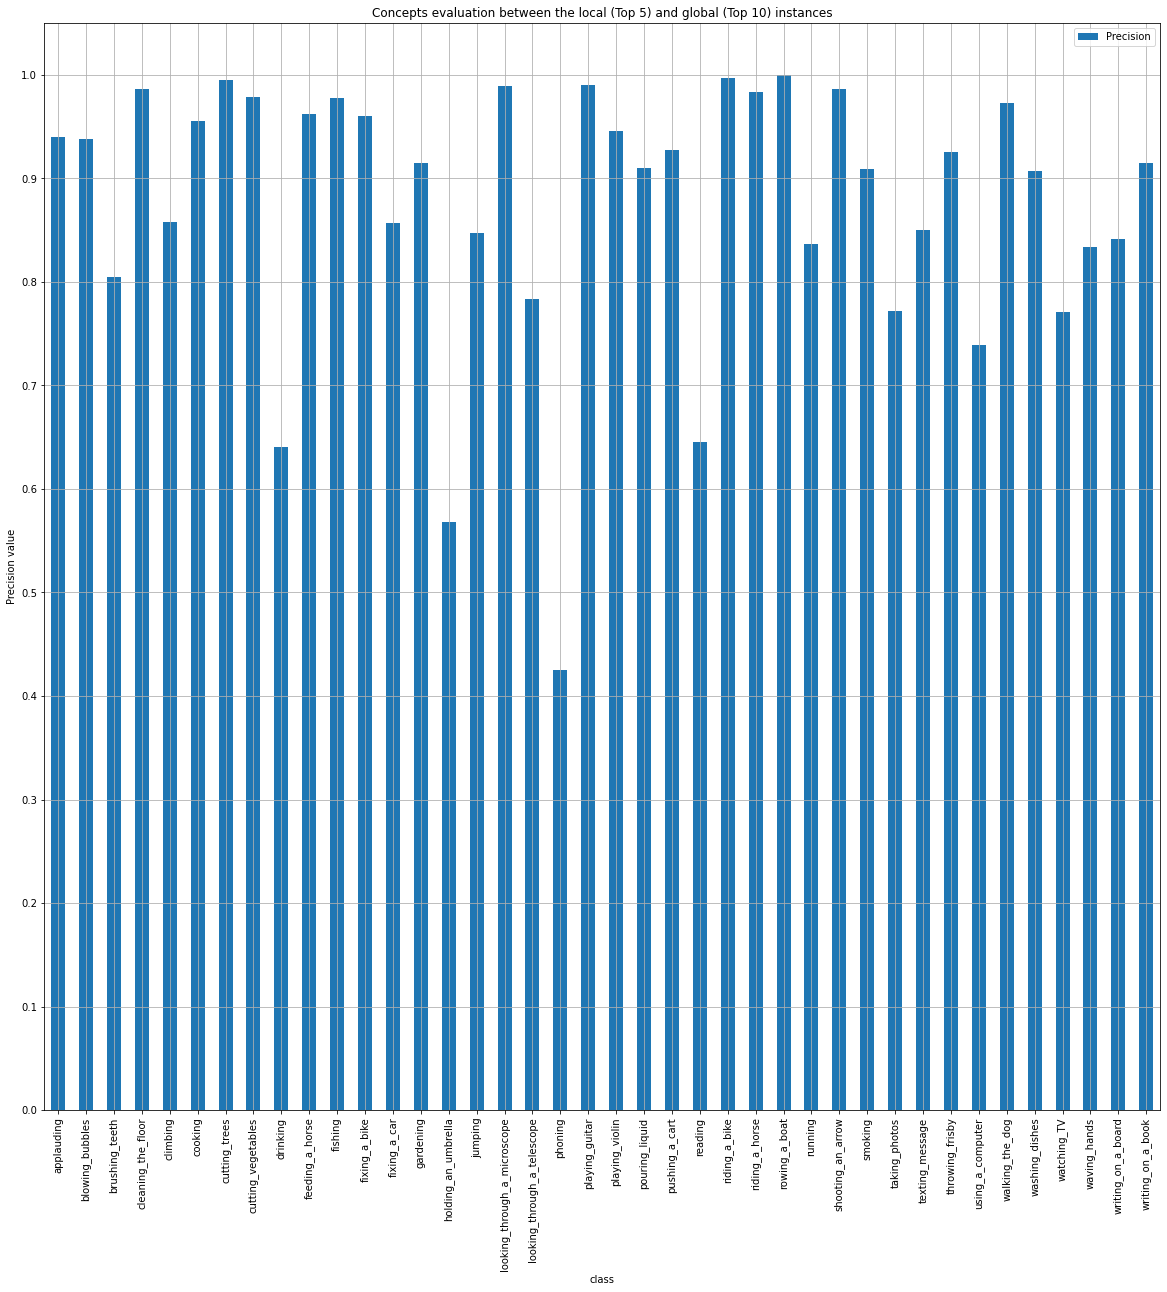

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))
df_label_10.groupby('class').agg({'y_predict':'mean'}).plot(kind='bar',ax=ax,grid=True)
ax.legend(['Precision'])
plt.title('Concepts evaluation between the local (Top 5) and global (Top 10) instances')
plt.yticks(np.arange(0,1.1, 0.1))
plt.ylabel('Precision value')
plt.show()

Metrics based on Top 10 Local and Top 10 Global

In [47]:
df_label_10_ = lf_10_list.merge(gf_10_list[['class','label']],on='class',how='outer')

In [48]:
df_label_10_['y_true'] = 1

In [49]:
df_label_10_['y_predict'] = df_label_10_.apply(lambda x: comparison_list(x.label_x, x.label_y), axis=1)

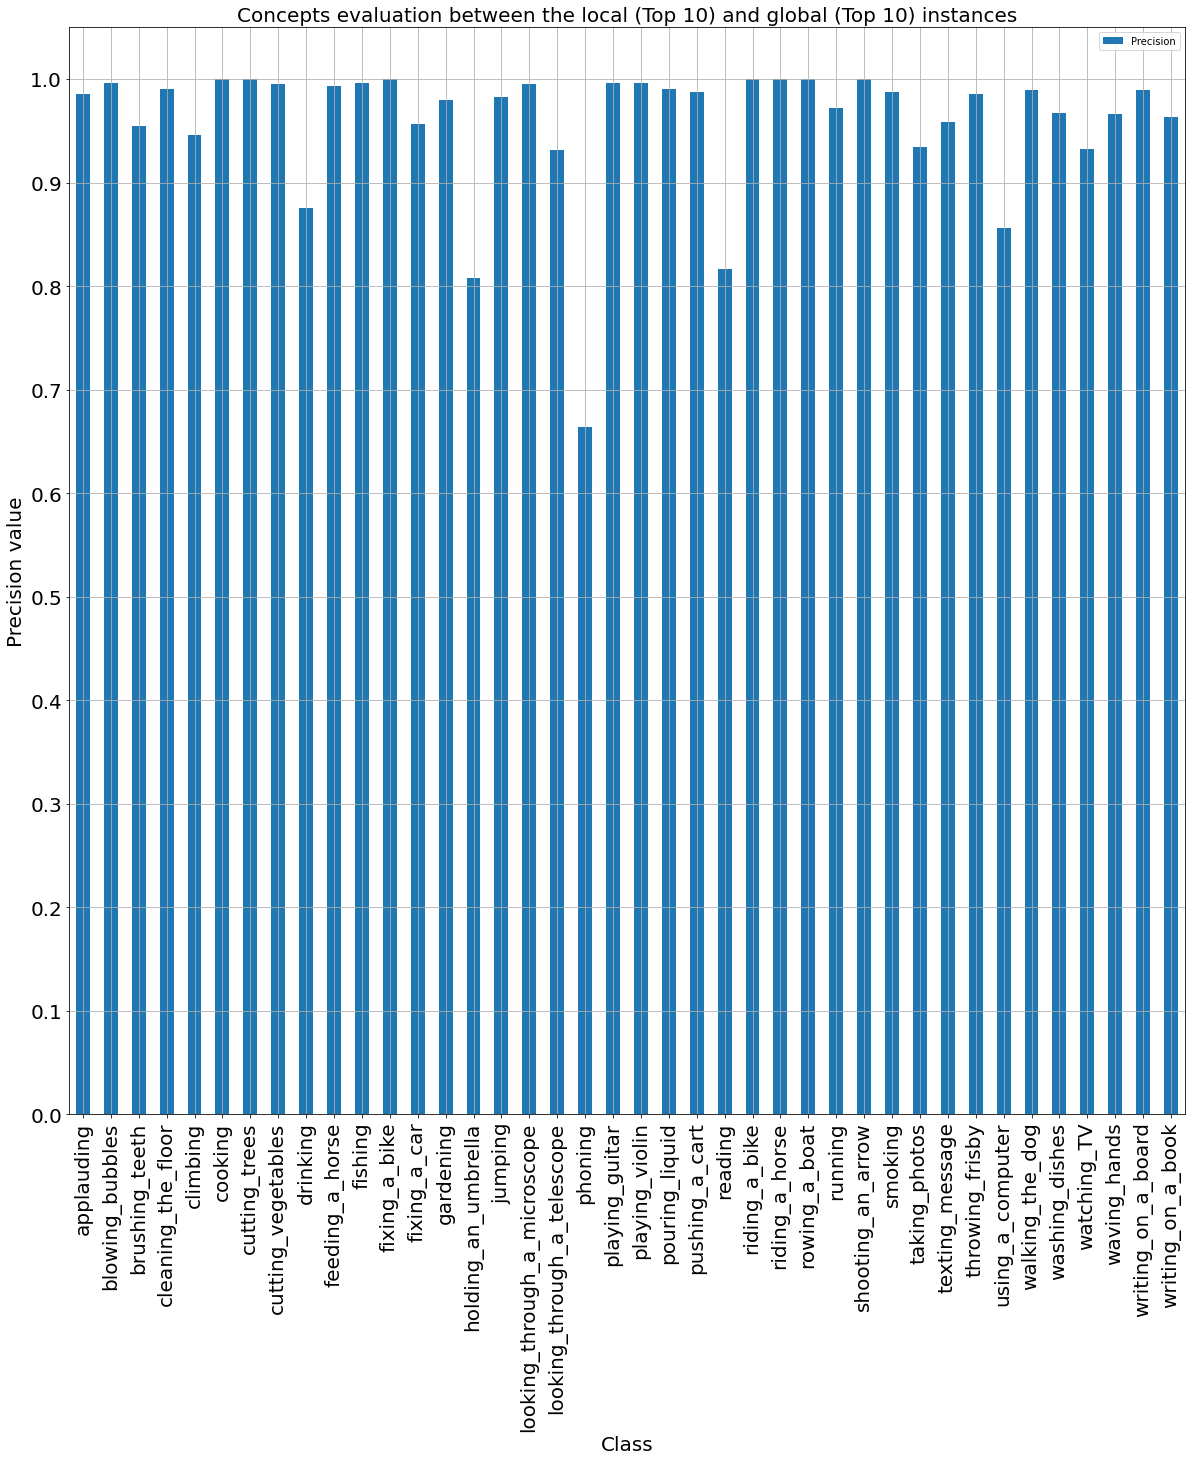

In [104]:
fig, ax = plt.subplots(figsize=(20, 20))
df_label_10_.groupby('class').agg({'y_predict':'mean'}).plot(kind='bar',ax=ax,grid=True)
ax.legend(['Precision'])
plt.title('Concepts evaluation between the local (Top 10) and global (Top 10) instances',fontsize=20)
plt.yticks(np.arange(0,1.1, 0.1),fontsize=20)
plt.ylabel('Precision value',fontsize=20)
plt.xlabel('Class',fontsize=20)
plt.xticks(fontsize=20)
plt.show()